<img src="image/data.png" width="800"/>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
import requests

In [2]:
#this function calculate Age
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
           
    return age

# Open the csv files
 that we saved before

In [3]:
df_Senior = pd.read_csv("df_senior.csv")

df_u20 = pd.read_csv("df_u20.csv")

df_progress = pd.read_csv("df_progress.csv")


In [4]:
df_Senior

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
0,1,9.58,0.9,Usain BOLT,33.0,JAM,1,"Olympiastadion, Berlin (GER)",2009-08-16,1356,/athletes/athlete=184599,37.578288,23.0
1,2,9.69,2.0,Tyson GAY,37.0,USA,1,Shanghai (CHN),2009-09-20,1316,/athletes/athlete=185464,37.151703,27.0
2,2,9.69,-0.1,Yohan BLAKE,30.0,JAM,1,"Pontaise, Lausanne (SUI)",2012-08-23,1316,/athletes/athlete=208640,37.151703,23.0
3,4,9.72,0.2,Asafa POWELL,37.0,JAM,1f1,"Pontaise, Lausanne (SUI)",2008-09-02,1305,/athletes/athlete=189571,37.037037,26.0
4,5,9.74,0.9,Justin GATLIN,38.0,USA,1,"Hamad Bin Suhaim, Doha (QAT)",2015-05-15,1298,/athletes/athlete=176453,36.960986,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,963,10.22,1.1,Philip MUKOMANA,46.0,ZIM,2,Harare (ZIM),2001-06-03,1132,/athletes/athlete=130121,35.225049,27.0
987,963,10.22,1.6,Kenji NARA,40.0,JPN,1,Kitakami (JPN),2001-07-14,1132,/athletes/athlete=134076,35.225049,22.0
988,963,10.22,1.7,Marco TORRIERI,42.0,ITA,1,Roma (ITA),2002-06-01,1132,/athletes/athlete=137250,35.225049,24.0
989,963,10.22,1.6,Fabrice CALLIGNY,38.0,FRA,3,St-Etienne (FRA),2002-07-13,1132,/athletes/athlete=172423,35.225049,21.0


# Analyze Senior DATA

1. Create cloud words of most comman countrys. 
2. Focus on the first 15 countries on the list.
3. Create a plot on the top 15 countries.
4. Create sns plot to see outliers. 
5. Show the outliers values.
6. Create a plot of record age. 
7. Create 5 plots of top 5 countries to analyze and see the record age in each one.
8. Show the avg record age of top 5 countries. 
9. Create scatter plot to emphasis the record age difference.
10. Show top 15 locations that most records been achived.
11. Show the avg wind in the top 5 locations.

Most common nationality :


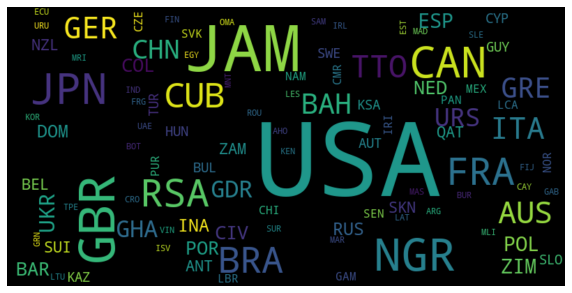

In [5]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from PIL import Image 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt


print("Most common nationality :")
wc = WordCloud(width=800, height=400, max_words=200,).generate_from_frequencies(df_Senior.Nat.value_counts())



plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
#Foucus on the first 15 countries
df_Senior.Nat.value_counts().head(15)

USA    335
JAM     85
GBR     46
NGR     37
CAN     32
JPN     32
RSA     26
FRA     26
BRA     23
CUB     20
TTO     17
AUS     16
GER     15
ITA     15
BAH     13
Name: Nat, dtype: int64

We can see that most of the runners coming from 
1. USA - 335
2. JAMAICE - 85
3. UK - 46
4. NIGERIA - 37
5. JAPAN , CANADA  etc, - 32 

Let see the plot of the first 15 countries to visualize where are the most runners coming from , as we can see the gap is pretty big between USA to other countries. 

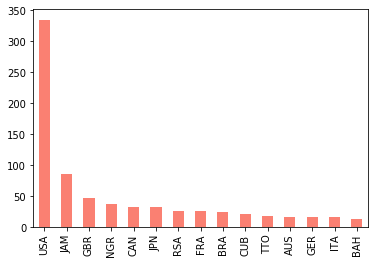

In [7]:
df_Senior.Nat.value_counts().head(15).plot(kind='bar',color='salmon')

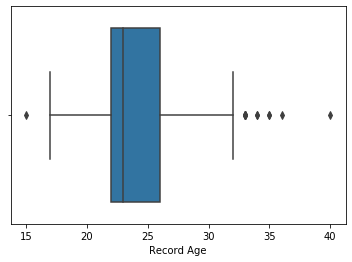

In [8]:
# wathcing outliers 
sns.boxplot(df_Senior['Record Age'])

In [9]:
df_Senior[df_Senior['Record Age']<=15]

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
863,818,10.2,2.0,Sachin DENNIS,17.0,JAM,1,Kingston (JAM),2018-03-23,1138,/athletes/athlete=309377,35.294118,15.0


In [10]:
df_Senior[df_Senior['Record Age']>=34]

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
24,25,9.87,0.3,Linford CHRISTIE,60.0,GBR,1,"Gottlieb-Daimler Stadion, Stuttgart (GER)",1993-08-15,1252,/athletes/athlete=496,36.474164,34.0
63,57,9.93,1.9,Kim COLLINS,44.0,SKN,1f2,Bottrop (GER),2016-05-29,1231,/athletes/athlete=20646,36.253776,40.0
601,592,10.16,-0.9,Troy DOUGLAS,57.0,NED,1,Apeldoorn (NED),1999-06-26,1157,/athletes/athlete=734,35.433071,36.0
622,592,10.16,1.4,Jamial ROLLE,39.0,BAH,2f3,"Clermont, FL (USA)",2016-05-14,1152,/athletes/athlete=185155,35.433071,35.0
623,592,10.16,1.5,Ryan SHIELDS,37.0,JAM,1f1,Oordegem (BEL),2017-05-27,1152,/athletes/athlete=193089,35.433071,34.0
631,592,10.16,1.9,Patrick Ike CHINEDU,36.0,ESP,2,Getafe (ESP),2018-07-21,1152,/athletes/athlete=239729,35.433071,35.0


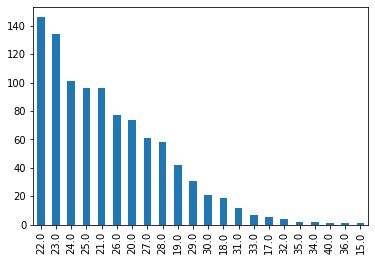

In [11]:

df_Senior.Rank=df_Senior.Rank.astype(int)

df_Senior['Record Age'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Number')

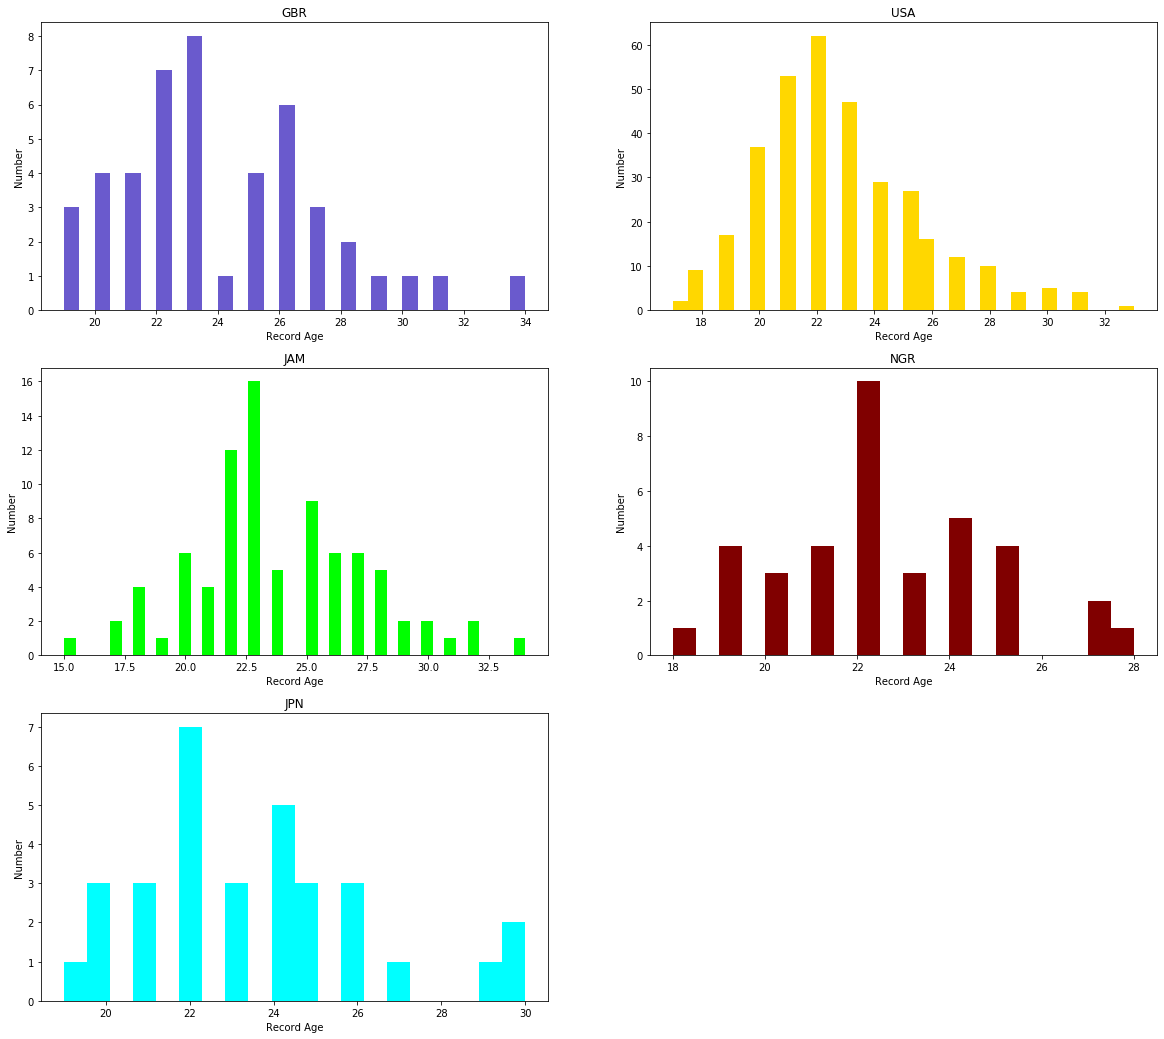

In [12]:
fig = plt.figure(figsize=(20, 18))

# create a subplot in a 1 by 3 grid, and return subplot specified in third parameter
fig1 = fig.add_subplot(3,2,1)
fig2 = fig.add_subplot(3,2,2)
fig3 = fig.add_subplot(3,2,3)
fig4 = fig.add_subplot(3,2,4)
fig5 = fig.add_subplot(3,2,5)


fig2.hist(df_Senior['Record Age'][df_Senior.Nat=='USA'],bins=30,color='gold')
fig2.set_title('USA')
fig2.set_xlabel('Record Age')
fig2.set_ylabel('Number')

fig1.hist(df_Senior['Record Age'][df_Senior.Nat=='GBR'],bins=30,color = 'slateblue')
fig1.set_title('GBR')
fig1.set_xlabel('Record Age')
fig1.set_ylabel('Number')

fig3.hist(df_Senior['Record Age'][df_Senior.Nat=='JAM'],bins=40,color= 'lime')
fig3.set_title('JAM')
fig3.set_xlabel('Record Age')
fig3.set_ylabel('Number')



fig4.hist(df_Senior['Record Age'][df_Senior.Nat=='NGR'],bins=20,color= 'maroon')
fig4.set_title('NGR')
fig4.set_xlabel('Record Age')
fig4.set_ylabel('Number')


fig5.hist(df_Senior['Record Age'][df_Senior.Nat=='JPN'],bins=20,color= 'aqua')
fig5.set_title('JPN')
fig5.set_xlabel('Record Age')
fig5.set_ylabel('Number')

In [13]:
#check avg record age for those 5 county 
country = ['USA','GBR','NGR','JAM','JPN']
meanList = list()
meanList.append(df_Senior[df_Senior.Nat=='USA']['Record Age'].mean())
meanList.append(df_Senior[df_Senior.Nat=='GBR']['Record Age'].mean())
meanList.append(df_Senior[df_Senior.Nat=='NGR']['Record Age'].mean())
meanList.append(df_Senior[df_Senior.Nat=='JAM']['Record Age'].mean())
meanList.append(df_Senior[df_Senior.Nat=='JPN']['Record Age'].mean())
data = {
    'Nat':country,
    'Mean Age':meanList}
top_5 = pd.DataFrame(data)

In [14]:
print(df_Senior[df_Senior.Nat=='USA']['Record Age'].mean())
print(df_Senior[df_Senior.Nat=='GBR']['Record Age'].mean())
print(df_Senior[df_Senior.Nat=='NGR']['Record Age'].mean())
print(df_Senior[df_Senior.Nat=='JAM']['Record Age'].mean())
print(df_Senior[df_Senior.Nat=='JPN']['Record Age'].mean())

22.77910447761194
23.91304347826087
22.405405405405407
23.83529411764706
23.5625


## Insight 

We can see that the top 10 records indeed involve the most common countries(USA,JAM),

But we can see that the average record age is more then 22-23.

That represent the average record age of top 5 countries(we can see this above and below).

In [15]:
#look expention above 
df_Senior.head(10)

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
0,1,9.58,0.9,Usain BOLT,33.0,JAM,1,"Olympiastadion, Berlin (GER)",2009-08-16,1356,/athletes/athlete=184599,37.578288,23.0
1,2,9.69,2.0,Tyson GAY,37.0,USA,1,Shanghai (CHN),2009-09-20,1316,/athletes/athlete=185464,37.151703,27.0
2,2,9.69,-0.1,Yohan BLAKE,30.0,JAM,1,"Pontaise, Lausanne (SUI)",2012-08-23,1316,/athletes/athlete=208640,37.151703,23.0
3,4,9.72,0.2,Asafa POWELL,37.0,JAM,1f1,"Pontaise, Lausanne (SUI)",2008-09-02,1305,/athletes/athlete=189571,37.037037,26.0
4,5,9.74,0.9,Justin GATLIN,38.0,USA,1,"Hamad Bin Suhaim, Doha (QAT)",2015-05-15,1298,/athletes/athlete=176453,36.960986,33.0
5,6,9.76,0.6,Christian COLEMAN,24.0,USA,1f,"Khalifa International Stadium, Doha (QAT)",2019-09-28,1291,/athletes/athlete=291462,36.885246,24.0
6,7,9.78,0.9,Nesta CARTER,34.0,JAM,1,"Guidobaldi, Rieti (ITA)",2010-08-29,1283,/athletes/athlete=200802,36.809816,25.0
7,8,9.79,0.1,Maurice GREENE,45.0,USA,1f3,Athina (GRE),1999-06-16,1280,/athletes/athlete=15044,36.772217,24.0
8,9,9.80,1.3,Steve MULLINGS,37.0,JAM,1,"Hayward Field, Eugene, OR (USA)",2011-06-04,1276,/athletes/athlete=177490,36.734694,28.0
9,10,9.82,1.7,Richard THOMPSON,35.0,TTO,1f2,Port-of-Spain (TTO),2014-06-21,1269,/athletes/athlete=206487,36.659878,29.0


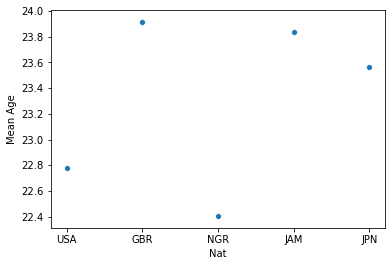

In [16]:
sns.scatterplot(x='Nat', y='Mean Age',data=top_5)
# we chose this table to emphsis the diffrence on the mean age .

In [17]:
df_Senior.Venue.value_counts().head(15)

Eugene, OR (USA)                            32
Austin, TX (USA)                            30
Kingston (JAM)                              28
Fayetteville, AR (USA)                      13
Indianapolis, IN (USA)                      12
Port-of-Spain (TTO)                         12
Hayward Field, Eugene, OR (USA)             11
La Chaux-de-Fonds (SUI)                     11
Knoxville, TN (USA)                         11
Tampa, FL (USA)                             10
La Habana (CUB)                             10
Walnut, CA (USA)                            10
Provo, UT (USA)                              9
Ciudad de México (MEX)                       9
Estadio Olímpico, Ciudad de México (MEX)     9
Name: Venue, dtype: int64

In [18]:
df_Senior.Wind = df_Senior.Wind.astype(float)
windList=list()
venue = ['Eugene, OR (USA)','Austin, TX (USA)','Kingston (JAM)','Fayetteville, AR (USA)','Indianapolis, IN (USA)']
windList.append(df_Senior[df_Senior.Venue=='Eugene, OR (USA)'].Wind.mean())
windList.append(df_Senior[df_Senior.Venue=='Austin, TX (USA)'].Wind.mean())
windList.append(df_Senior[df_Senior.Venue=='Kingston (JAM)'].Wind.mean())
windList.append(df_Senior[df_Senior.Venue=='Fayetteville, AR (USA)'].Wind.mean())
windList.append(df_Senior[df_Senior.Venue=='Indianapolis, IN (USA)'].Wind.mean())
data={
    'Venue':venue,
    'AvgWind':windList}
top_5_venue = pd.DataFrame(data)

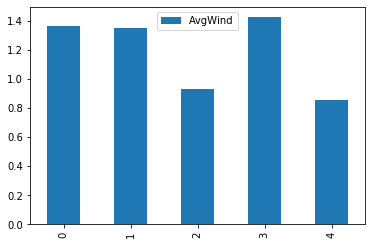

In [19]:
top_5_venue.plot(kind='bar')


# Conclusion Seniors 

* The numbers is matching to the analyzed actions.

(1-3) 
We can see that most common nationality is USA, as result we can assume that USA 
is encourage athletics, another possible reason is the big number of population in USA.
      
(4-9)
We chose to analyze the record age of the runners, it was very interesting to see that most of the records 
achieved at the age of 20-25. In our analyzation we noticed couple of unique outliers runners that achieved their
record at a young age / older age and broke the patten.(look the insight above for more)
      
(10-11) 
We wanted to look if there is connection between the place of the competition to the fact the a record been made.
So for that we searched the top 15 Venues and the average wind in those place in order for us to see if those 
location gave any advantage to the runners.
Since we can see the graph above us, Wind speed is above 1 we can assume there is a slit advantage,
But we know there are rule to prevent wind advantage from runners and since we  don't have further information 
about the runners (height,weight etc.) so we cant conclude noting about it. 
        
### Cool Fact

In June 2008 Tyson Gay ran a time of 9.68 seconds with the help of a +4.1 m/s tailwind. 
That mark was surpassed when Usain Bolt set the current world record the following year, 9.58 with a legal +0.9 tailwind. 


<img src="image/bolt.png" width="800"/>

# Analyze U20 DATA 

1. Create cloud words of most comman countrys. 
2. Focus on the first 15 countries on the list.
3. Create a plot on the top 15 countries.
4. Create sns plot to see outliers. 
5. Show the outliers values.
6. Create a plot of record age. 
7. Create 5 plots of top 5 countries to analyze and see the record age in each one.
8. Show the avg record age of top 5 countries. 
9. Create scatter plot to emphasis the record age difference.
10. Show top 15 locations that most records been achived.
11. Show the avg wind in the top 5 locations.

Most common nationality :


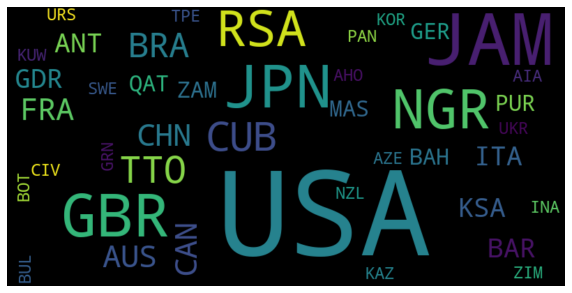

In [20]:
print("Most common nationality :")
wc = WordCloud(width=800, height=400, max_words=200,).generate_from_frequencies(df_u20.Nat.value_counts())



plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#Foucus on the first 15 countries
df_u20.Nat.value_counts().head(15)

USA    114
JAM     26
GBR     17
JPN     17
NGR     14
RSA     12
CUB      7
TTO      6
BRA      5
AUS      4
CHN      4
FRA      4
CAN      4
ANT      3
ITA      3
Name: Nat, dtype: int64

We can see that most of the runners coming from 
1. USA - 114
2. JAMAICE - 26
3. JAPAN,UK - 17
4. UK - 17
5. NIGERIA- 14 

Let see the plot of the first 15 countries to visualize where are the most runners coming from , as we can see the gap is pretty big between USA to other countries. 

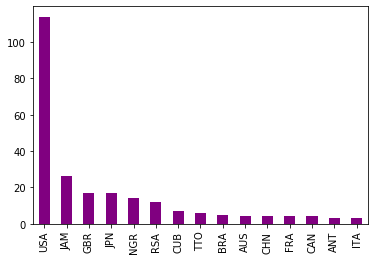

In [22]:
df_u20.Nat.value_counts().head(15).plot(kind='bar',color='purple')

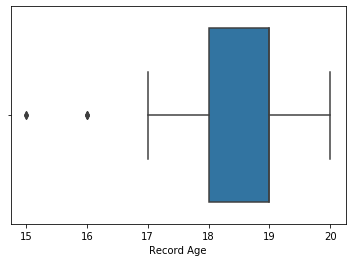

In [23]:
sns.boxplot(df_u20['Record Age'])

In [24]:
df_u20[df_u20['Record Age']<=16]

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
99,95,10.20,2.0,Sachin DENNIS,17.0,JAM,1,Kingston (JAM),2018-03-23,1138,/athletes/athlete=309377,35.294118,15.0
216,217,10.28,0.0,Chinedu ORIALA,38.0,NGR,h,Benin City (NGR),1997-03-21,1112,/athletes/athlete=172879,35.019455,15.0
217,217,10.28,1.5,Hisashi MIYAZAKI,39.0,JPN,1,Kurube (JPN),1997-06-29,1112,/athletes/athlete=179945,35.019455,16.0
239,238,10.29,2.0,Nicholas JOHNSON,36.0,USA,3,"Denton, TX (USA)",2000-06-23,1108,/athletes/athlete=176639,34.985423,16.0
261,263,10.30,1.0,Sybrand VAN DYK,34.0,RSA,1,Germiston (RSA),2002-03-09,1105,/athletes/south-africa/sybrand-van-dyk-014221381,34.951456,16.0


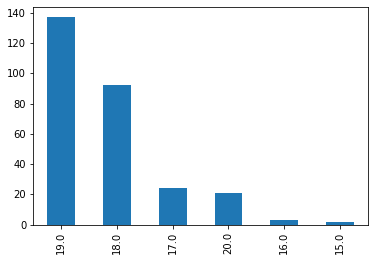

In [25]:
df_u20.Rank=df_u20.Rank.astype(int)

df_u20['Record Age'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Number')

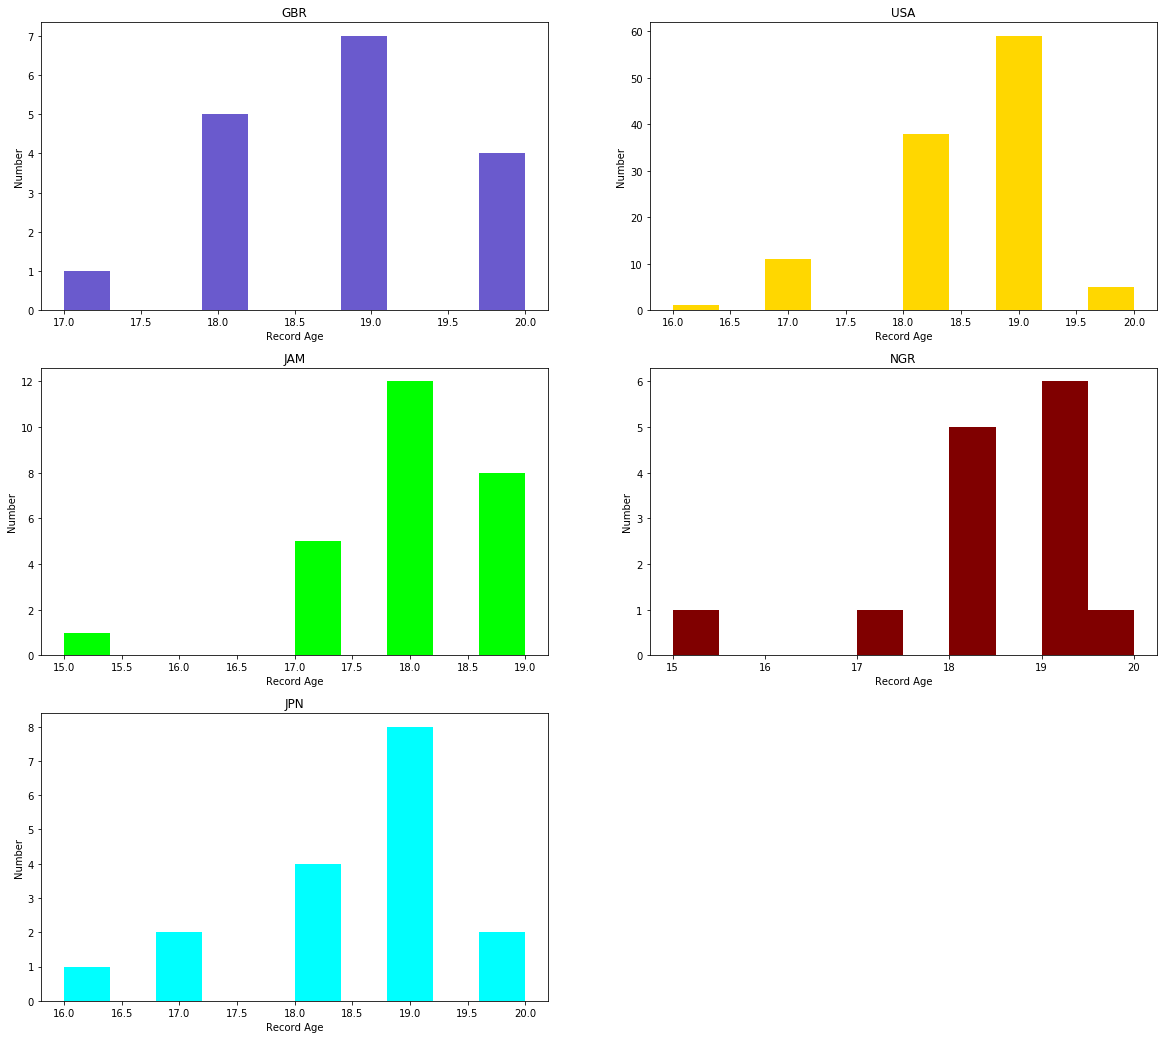

In [26]:
fig = plt.figure(figsize=(20, 18))

# create a subplot in a 1 by 3 grid, and return subplot specified in third parameter
fig1 = fig.add_subplot(3,2,1)
fig2 = fig.add_subplot(3,2,2)
fig3 = fig.add_subplot(3,2,3)
fig4 = fig.add_subplot(3,2,4)
fig5 = fig.add_subplot(3,2,5)


fig2.hist(df_u20['Record Age'][df_u20.Nat=='USA'],bins=10,color='gold')
fig2.set_title('USA')
fig2.set_xlabel('Record Age')
fig2.set_ylabel('Number')

fig1.hist(df_u20['Record Age'][df_u20.Nat=='GBR'],bins=10,color = 'slateblue')
fig1.set_title('GBR')
fig1.set_xlabel('Record Age')
fig1.set_ylabel('Number')

fig3.hist(df_u20['Record Age'][df_u20.Nat=='JAM'],bins=10,color= 'lime')
fig3.set_title('JAM')
fig3.set_xlabel('Record Age')
fig3.set_ylabel('Number')



fig4.hist(df_u20['Record Age'][df_u20.Nat=='NGR'],bins=10,color= 'maroon')
fig4.set_title('NGR')
fig4.set_xlabel('Record Age')
fig4.set_ylabel('Number')


fig5.hist(df_u20['Record Age'][df_u20.Nat=='JPN'],bins=10,color= 'aqua')
fig5.set_title('JPN')
fig5.set_xlabel('Record Age')
fig5.set_ylabel('Number')

In [27]:
#check avg record age for those 5 county 
country = ['USA','GBR','NGR','JAM','JPN']
meanList = list()
meanList.append(df_u20[df_u20.Nat=='USA']['Record Age'].mean())
meanList.append(df_u20[df_u20.Nat=='GBR']['Record Age'].mean())
meanList.append(df_u20[df_u20.Nat=='NGR']['Record Age'].mean())
meanList.append(df_u20[df_u20.Nat=='JAM']['Record Age'].mean())
meanList.append(df_u20[df_u20.Nat=='JPN']['Record Age'].mean())
data = {
    'Nat':country,
    'Mean Age':meanList}
top_5 = pd.DataFrame(data)

In [28]:
print(df_u20[df_u20.Nat=='USA']['Record Age'].mean())
print(df_u20[df_u20.Nat=='GBR']['Record Age'].mean())
print(df_u20[df_u20.Nat=='NGR']['Record Age'].mean())
print(df_u20[df_u20.Nat=='JAM']['Record Age'].mean())
print(df_u20[df_u20.Nat=='JPN']['Record Age'].mean())

18.49122807017544
18.823529411764707
18.285714285714285
18.0
18.470588235294116


## Insight 

We can see that the top 10 records indeed involve the most common countries(USA) and even countries that not show in top 10.

But we can see that the average record age is close to the average age of top countries.

A refreshing change from the seniors that we saw a different outcome.



In [29]:
df_u20.head(10)

,Rank,Mark,Wind,Competitor,Age,Nat,Pos,Venue,Date,ResultScore,href,Avg Speed kph,Record Age
0,1,9.97,1.8,Trayvon BROMELL,25.0,USA,1,"Eugene, OR (USA)",2014-06-13,1217,https://www.worldathletics.org/athletes/athlet...,36.108325,19.0
1,2,10.00,1.6,Trentavis FRIDAY,25.0,USA,1h1,"Eugene, OR (USA)",2014-07-05,1206,https://www.worldathletics.org/athletes/athlet...,36.000000,19.0
2,3,10.01,0.0,Darrel BROWN,35.0,TTO,1qf3,"Stade de France, Paris-St-Denis (FRA)",2003-08-24,1203,https://www.worldathletics.org/athletes/athlet...,35.964036,19.0
3,3,10.01,1.6,Jeff DEMPS,30.0,USA,2qf1,"Eugene, OR (USA)",2008-06-28,1203,https://www.worldathletics.org/athletes/athlet...,35.964036,18.0
4,3,10.01,0.9,Yoshihide KIRYU,24.0,JPN,1h3,Hiroshima (JPN),2013-04-28,1203,https://www.worldathletics.org/athletes/athlet...,35.964036,17.0
5,6,10.03,0.7,Marcus ROWLAND,30.0,USA,1,Port-of-Spain (TTO),2009-07-31,1196,https://www.worldathletics.org/athletes/athlet...,35.892323,20.0
6,6,10.03,1.7,Lalu Muhammad ZOHRI,20.0,INA,3,"Nagai Stadium, Osaka (JPN)",2019-05-19,1196,https://www.worldathletics.org/athletes/athlet...,35.892323,19.0
7,8,10.04,1.7,D'Angelo CHERRY,29.0,USA,1h4,"Fayetteville, AR (USA)",2009-06-10,1193,https://www.worldathletics.org/athletes/athlet...,35.856574,18.0
8,8,10.04,0.2,Christophe LEMAITRE,30.0,FRA,1,Novi Sad (SRB),2009-07-24,1193,https://www.worldathletics.org/athletes/athlet...,35.856574,20.0
9,8,10.04,1.9,Abdullah Abkar MOHAMMED,23.0,KSA,1f3,"Walnut, CA (USA)",2016-04-15,1193,https://www.worldathletics.org/athletes/athlet...,35.856574,19.0


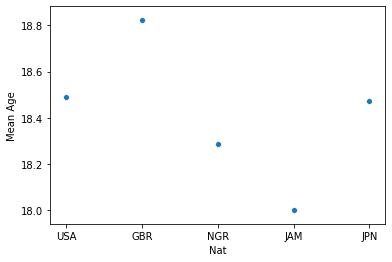

In [30]:
sns.scatterplot(x='Nat', y='Mean Age',data=top_5)
# we chose this table to emphsis the diffrence on the mean age .

In [31]:
df_u20.Venue.value_counts().head(15)

Kingston (JAM)                         15
Eugene, OR (USA)                       13
Austin, TX (USA)                       10
Port-of-Spain (TTO)                     6
Indianapolis, IN (USA)                  5
Bedford (GBR)                           5
Ratina Stadium, Tampere (FIN)           4
Fayetteville, AR (USA)                  4
Walnut, CA (USA)                        4
La Habana (CUB)                         4
Estadio Universitario, Lisboa (POR)     4
Pretoria (RSA)                          4
Hiroshima (JPN)                         4
Los Angeles, CA (USA)                   3
Towson, MD (USA)                        3
Name: Venue, dtype: int64

In [32]:
df_u20.Wind = df_u20.Wind.astype(float)
windList=list()
venue = ['Eugene, OR (USA)','Austin, TX (USA)','Kingston (JAM)','Fayetteville, AR (USA)','Indianapolis, IN (USA)']
windList.append(df_u20[df_u20.Venue=='Eugene, OR (USA)'].Wind.mean())
windList.append(df_u20[df_u20.Venue=='Austin, TX (USA)'].Wind.mean())
windList.append(df_u20[df_u20.Venue=='Kingston (JAM)'].Wind.mean())
windList.append(df_u20[df_u20.Venue=='Port-of-Spain (TTO)'].Wind.mean())
windList.append(df_u20[df_u20.Venue=='Indianapolis, IN (USA)'].Wind.mean())
data={
    'Venue':venue,
    'AvgWind':windList}
top_5_venue = pd.DataFrame(data)

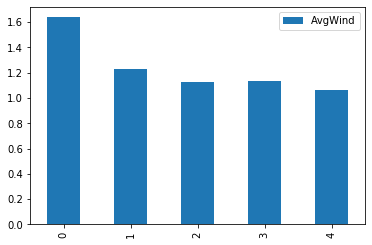

In [33]:
top_5_venue.plot(kind='bar')


# Conclusion U20 

* The numbers is matching to the analyzed actions.

(1-3)

We can see that most common nationality is USA,
As result we can assume that USA is encourage athletics.
Another possible reason is the big number of population in USA.
<u>In addition the senior top 5 countries and u20 top 5 countries are the same !</u>
      
(4-9)

We chose to analyze the record age of the runners, it was very interesting to see that most of the records 
achieved at the age of 18. In our analyzation we noticed couple of unique outliers runners that achieved their
record at a young age(15-16) and broke the patten.(look the insight above for more)
      
(10-11) 

We wanted to look if there is connection between the place of the competition to the fact the a record been made.
So for that we searched the top 15 Venues and the average wind in those place in order for us to see if those 
location gave any advantage to the runners.
Since we can see the graph above us, Wind speed is above 1 we can assume there is a slit advantage,
But we know there are rule to prevent wind advantage from runners and since we  don't have further information 
about the runners (height,weight etc.) so we cant conclude noting about it. 
         
## Cool Fact (youngest marathon runner)
Budhia Singh (born 2002) is a former Indian long distance runner who became notable for his athletic feats as a child. He has been acclaimed as the world's youngest marathon runner. He ran from Puri to Bhubaneswar at the age of five covering 65 kilometres (40 mi) in seven hours and two minutes and was listed as the world's youngest marathon runner in the 2006 edition of the Limca Book of Records, an Indian record book.


<img src="image/kid.png" width="1000"/>

# Analyze Progress DATA 

In [34]:
df_progress.head(60)

,Competitor,Code,Mark,Wind,Year,Venue,Date,Rank,Age,Nat,Record Age,Avg Speed kph,Progress Age
0,Usain BOLT,14201847.0,9.95,0.7,2017,"Stade Louis II, Monaco (MON)",2017-07-21,1,33.0,JAM,23.0,36.180905,31.0
1,Usain BOLT,14201847.0,9.81,0.2,2016,"Estádio Olímpico, Rio de Janeiro (BRA)",2016-08-14,1,33.0,JAM,23.0,36.697248,30.0
2,Usain BOLT,14201847.0,9.79,-0.5,2015,"National Stadium, Beijing (CHN)",2015-08-23,1,33.0,JAM,23.0,36.772217,29.0
3,Usain BOLT,14201847.0,9.98,-0.6,2014,Warszawa (POL),2014-08-23,1,33.0,JAM,23.0,36.072144,28.0
4,Usain BOLT,14201847.0,9.77,-0.3,2013,"Luzhniki, Moskva (RUS)",2013-08-11,1,33.0,JAM,23.0,36.847492,27.0
5,Usain BOLT,14201847.0,9.63,1.5,2012,"Olympic Stadium, London (GBR)",2012-08-05,1,33.0,JAM,23.0,37.383178,26.0
6,Usain BOLT,14201847.0,9.76,1.3,2011,"Boudewijnstadion, Bruxelles (BEL)",2011-09-16,1,33.0,JAM,23.0,36.885246,25.0
7,Usain BOLT,14201847.0,9.82,0.5,2010,"Pontaise, Lausanne (SUI)",2010-07-08,1,33.0,JAM,23.0,36.659878,23.0
8,Usain BOLT,14201847.0,9.58,0.9,2009,"Olympiastadion, Berlin (GER)",2009-08-16,1,33.0,JAM,23.0,37.578288,23.0
9,Usain BOLT,14201847.0,9.69,0.0,2008,"National Stadium, Beijing (CHN)",2008-08-16,1,33.0,JAM,23.0,37.151703,22.0


In [35]:
Usain = df_progress[df_progress.Competitor=="Usain BOLT"]
TysonGAY = df_progress[df_progress.Competitor=="Tyson GAY"]
YohanBLAKE = df_progress[df_progress.Competitor=="Yohan BLAKE"]
JustinGATLIN = df_progress[df_progress.Competitor=="Justin GATLIN"]
ChristianCOLEMAN = df_progress[df_progress.Competitor=="Christian COLEMAN"]

In [36]:
frames = [Usain,TysonGAY,YohanBLAKE,JustinGATLIN,ChristianCOLEMAN]
df_progressTop5 = pd.concat(frames)

In [37]:
print(df_progressTop5[df_progressTop5.Competitor=='Usain BOLT']['Avg Speed kph'].mean())
print(df_progressTop5[df_progressTop5.Competitor=='Tyson GAY']['Avg Speed kph'].mean())
print(df_progressTop5[df_progressTop5.Competitor=='Yohan BLAKE']['Avg Speed kph'].mean())
print(df_progressTop5[df_progressTop5.Competitor=='Justin GATLIN']['Avg Speed kph'].mean())
print(df_progressTop5[df_progressTop5.Competitor=='Christian COLEMAN']['Avg Speed kph'].mean())

36.73823823438025
35.94298299719088
35.860358663220396
36.26248878233866
36.135526473858526


In [38]:
# df_progressTop5.drop("Code",axis=1,inplace=True)
# df_progressTop5.drop("Venue",axis=1,inplace=True)
# df_progressTop5.drop("Date",axis=1,inplace=True)
# df_progressTop5.drop("Rank",axis=1,inplace=True)
# df_progressTop5.drop("Nat",axis=1,inplace=True)
# df_progressTop5.drop("Year",axis=1,inplace=True)
# df_progressTop5.drop("Wind",axis=1,inplace=True)
# df_progressTop5.drop("Age",axis=1,inplace=True)
# df_progressTop5.drop("Mark",axis=1,inplace=True)

D:\Programs\Anaconda\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


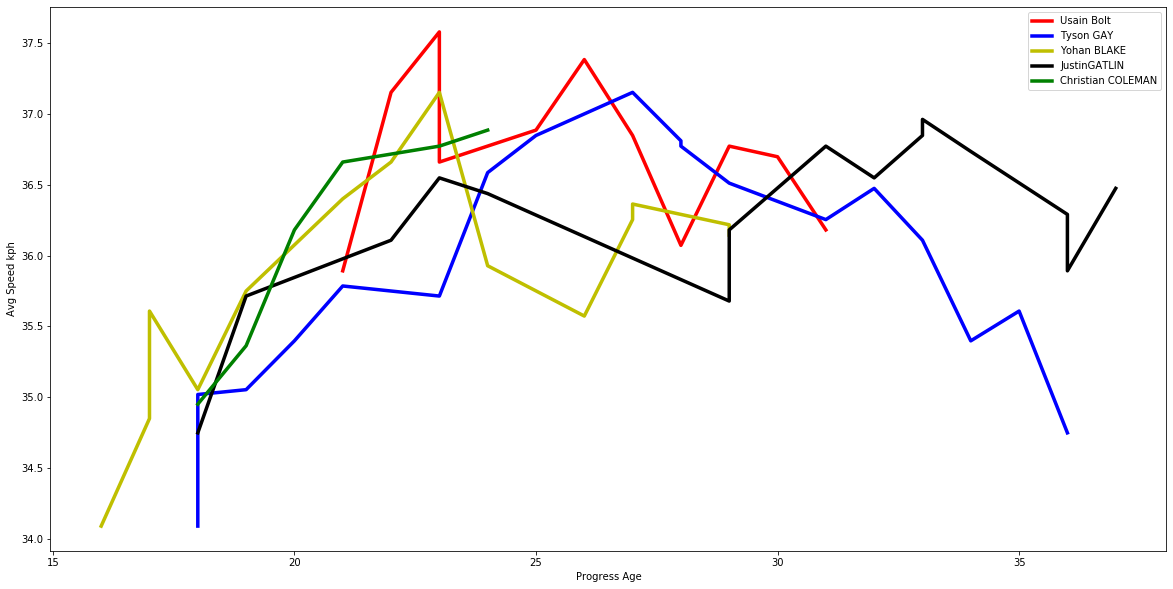

In [39]:
plt.figure(figsize=(20, 10))
plt.plot( 'Progress Age', 'Avg Speed kph', data=Usain, color='red',linewidth=3.5)
plt.plot( 'Progress Age', 'Avg Speed kph', data=TysonGAY, color='blue',linewidth=3.5)
plt.plot( 'Progress Age', 'Avg Speed kph', data=YohanBLAKE, color='Y',linewidth=3.5)
plt.plot( 'Progress Age', 'Avg Speed kph', data=JustinGATLIN, color='black',linewidth=3.5)
plt.plot( 'Progress Age', 'Avg Speed kph', data=ChristianCOLEMAN, color='green',linewidth=3.5)
plt.xlabel('Progress Age')
plt.ylabel('Avg Speed kph')
plt.legend(labels=['Usain Bolt','Tyson GAY','Yohan BLAKE','JustinGATLIN','Christian COLEMAN'])
plt.show()

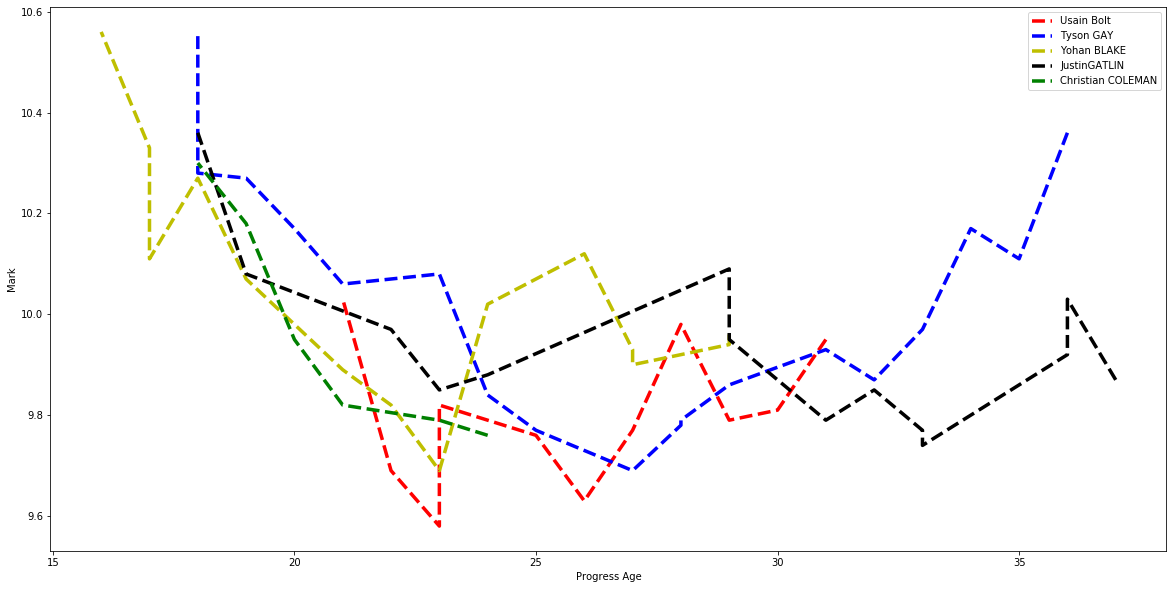

In [40]:
plt.figure(figsize=(20, 10))
plt.plot( 'Progress Age', 'Mark', data=Usain, color='red',linewidth=3.5,linestyle='dashed')
plt.plot( 'Progress Age', 'Mark', data=TysonGAY, color='blue',linewidth=3.5,linestyle='dashed')
plt.plot( 'Progress Age', 'Mark', data=YohanBLAKE, color='Y',linewidth=3.5,linestyle='dashed')
plt.plot( 'Progress Age', 'Mark', data=JustinGATLIN, color='black',linewidth=3.5,linestyle='dashed')
plt.plot( 'Progress Age', 'Mark', data=ChristianCOLEMAN, color='green',linewidth=3.5,linestyle='dashed')
plt.xlabel('Progress Age')
plt.ylabel('Mark')
plt.legend(labels=['Usain Bolt','Tyson GAY','Yohan BLAKE','JustinGATLIN','Christian COLEMAN'])

plt.show()

# Insight
### lower means better score

We can clearly see how the runners improved over the years from the young age to the age of 24.
Then the line graph becomes unstable and doing much more sharp uphill and downhill that show unstable behavior, only a fraction of runners improved there best score later on.  

In [41]:
df_progressTop5

,Competitor,Code,Mark,Wind,Year,Venue,Date,Rank,Age,Nat,Record Age,Avg Speed kph,Progress Age
0,Usain BOLT,14201847.0,9.95,0.7,2017,"Stade Louis II, Monaco (MON)",2017-07-21,1,33.0,JAM,23.0,36.180905,31.0
1,Usain BOLT,14201847.0,9.81,0.2,2016,"Estádio Olímpico, Rio de Janeiro (BRA)",2016-08-14,1,33.0,JAM,23.0,36.697248,30.0
2,Usain BOLT,14201847.0,9.79,-0.5,2015,"National Stadium, Beijing (CHN)",2015-08-23,1,33.0,JAM,23.0,36.772217,29.0
3,Usain BOLT,14201847.0,9.98,-0.6,2014,Warszawa (POL),2014-08-23,1,33.0,JAM,23.0,36.072144,28.0
4,Usain BOLT,14201847.0,9.77,-0.3,2013,"Luzhniki, Moskva (RUS)",2013-08-11,1,33.0,JAM,23.0,36.847492,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Christian COLEMAN,14541956.0,9.79,-0.3,2018,"Boudewijnstadion, Bruxelles (BEL)",2018-08-31,6,24.0,USA,24.0,36.772217,23.0
61,Christian COLEMAN,14541956.0,9.82,1.3,2017,"Eugene, OR (USA)",2017-06-07,6,24.0,USA,24.0,36.659878,21.0
62,Christian COLEMAN,14541956.0,9.95,1.7,2016,"Hayward Field, Eugene, OR (USA)",2016-07-03,6,24.0,USA,24.0,36.180905,20.0
63,Christian COLEMAN,14541956.0,10.18,2.0,2015,"Eugene, OR (USA)",2015-06-26,6,24.0,USA,24.0,35.363458,19.0


<img src="image/ml.png" width="900"/>

D:\Programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


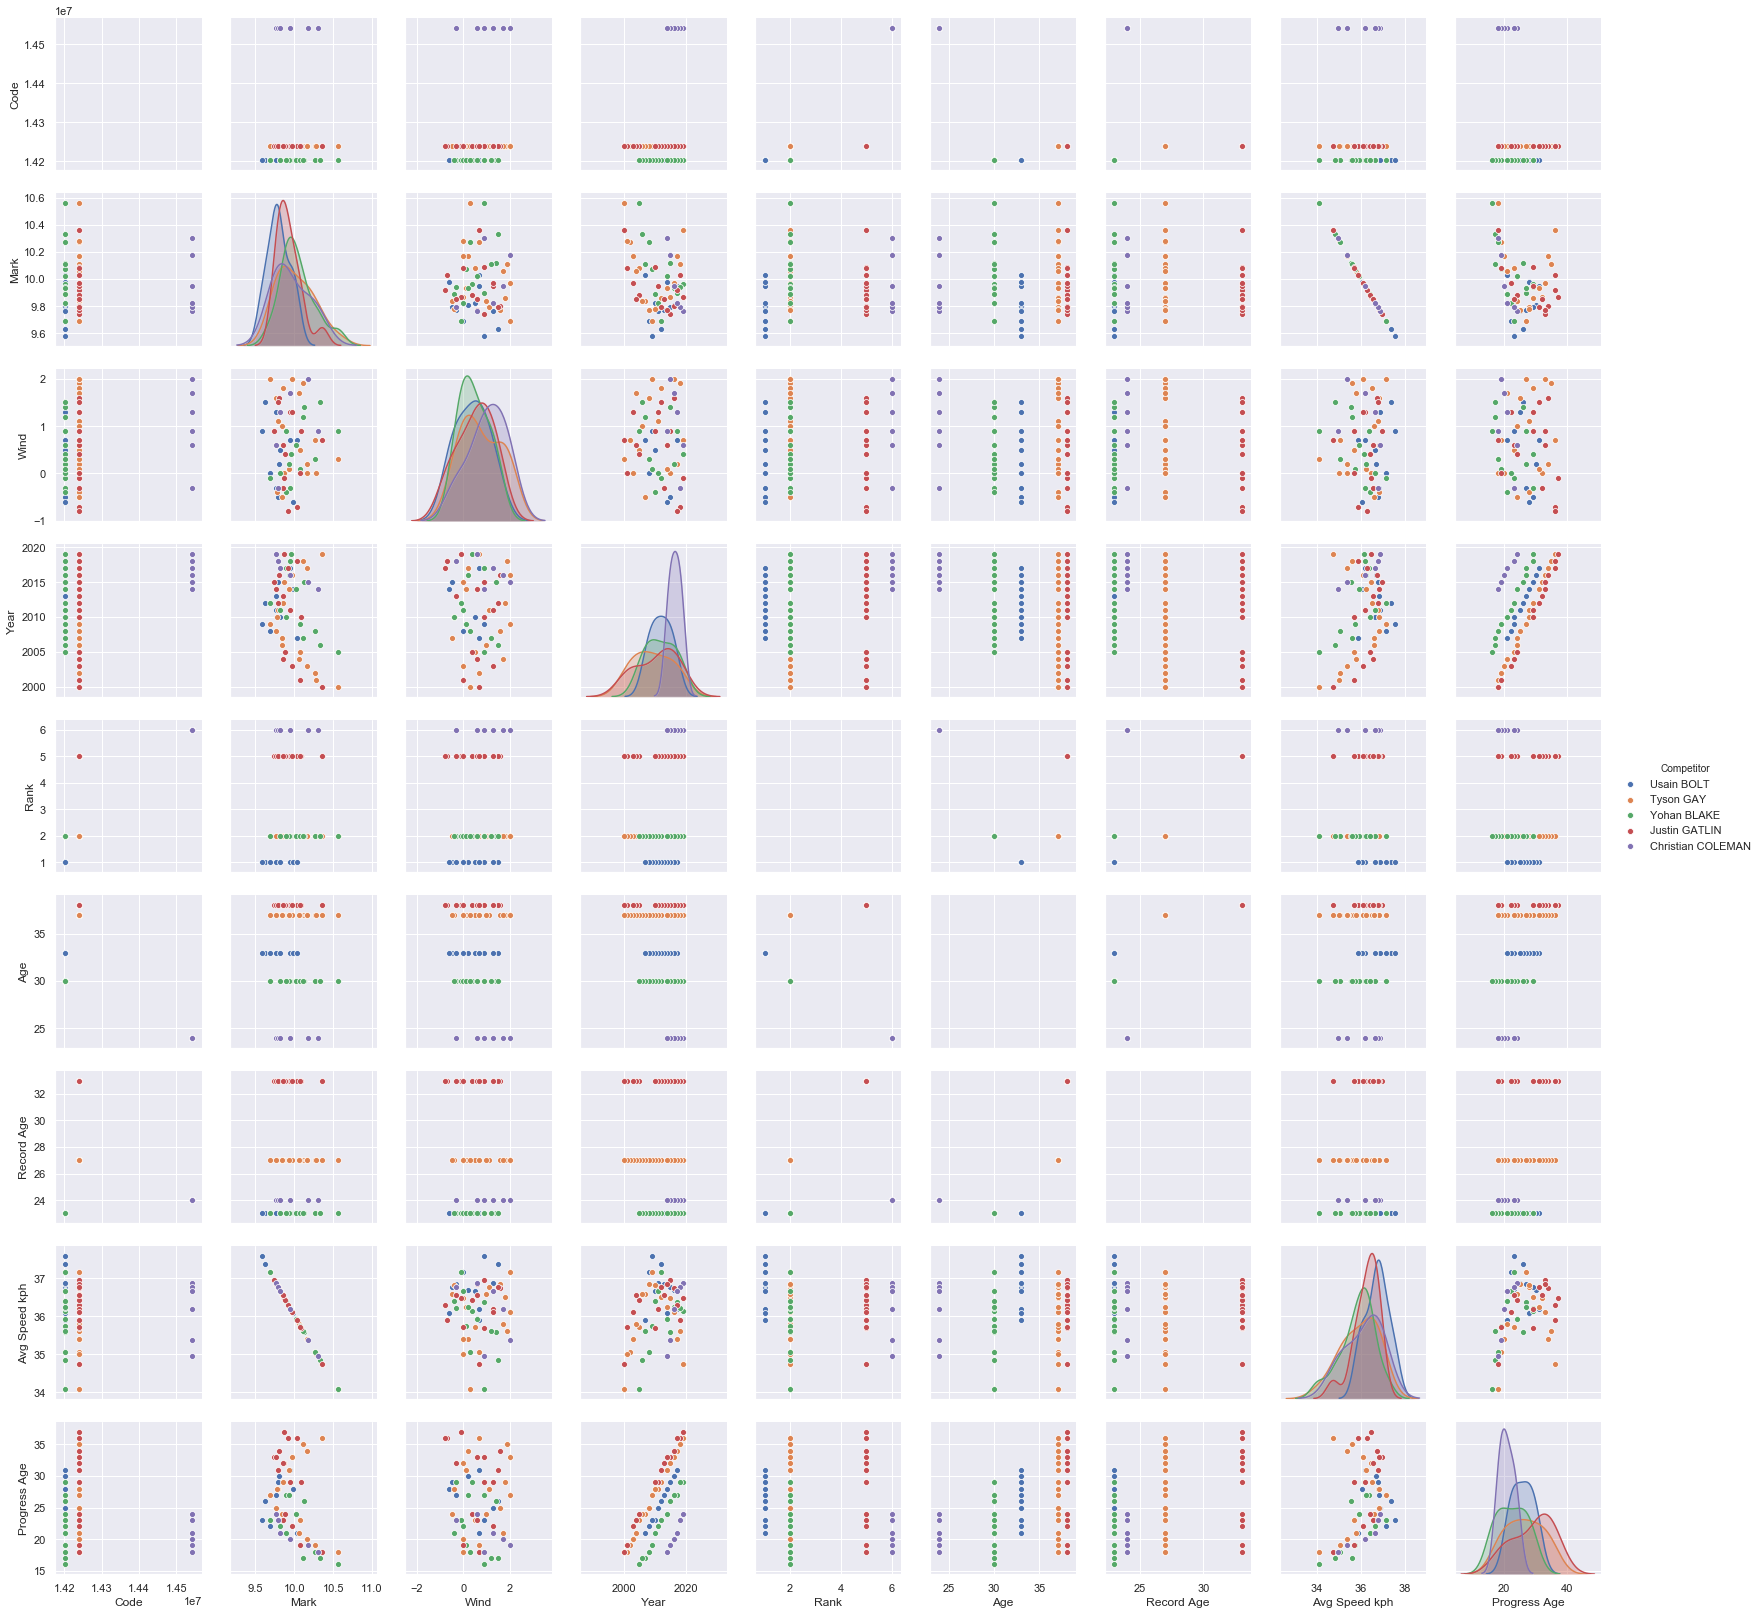

In [42]:
sns.set()
sns.pairplot(df_progressTop5,hue="Competitor")

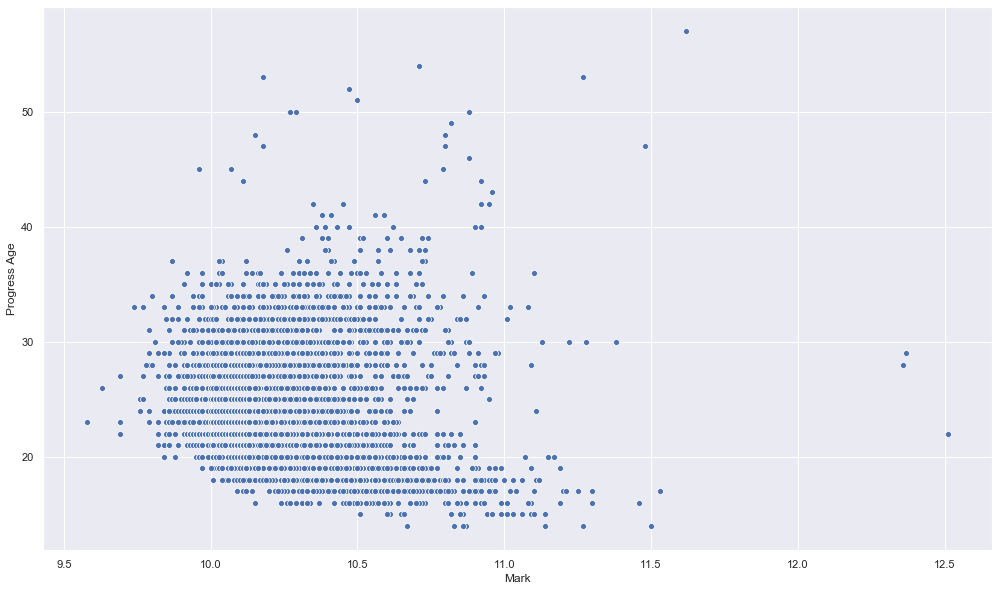

In [43]:
fig = plt.figure(figsize=(17, 10))
sns.scatterplot(x=df_progress['Mark'],y=df_progress['Progress Age'])

# Look for Insights
We used the sns.pairplot in order to find some connections between the runners, 
Applying it on df_progressTop5 dataframe runners allowed us to review the data in a convenient way.

# Decision Tree
The first Mechine Learning we chose to apply is <b>Decision Tree</b>. 

We wanted to predict if a runner will brake his best record in the years to come,for that we create a new column called 'Beat record', if the runner was younger then the age he broke his best record then the value of 'Beat record' will be 1 = True else will be 0= false.

After that we gave the Decision Tree 4 columns (feature_cols) and used them to help us prediciting the out come. As you will see below we chose the max depth of the tree to be 5 since it was the best prediction. 

Furthermore, We created a picture of our Decision Tree.

In [44]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [45]:
# Create beat record true or flase we taking the best mark of the runner and compare it to the proggress and check if the runner 
#beats is best record when he was older or younger . 
df_progress['Beat record'] = df_progress['Record Age']>=df_progress['Progress Age']

df_progress['Beat record']=df_progress['Beat record'].astype(int)

In [46]:

#split dataset in features and target variable
feature_cols = ['Wind', 'Progress Age', 'Mark','Avg Speed kph']
X = df_progress[feature_cols] # Features
y = df_progress['Beat record'] # Target variable

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [48]:
X_train

,Wind,Progress Age,Mark,Avg Speed kph
396,0.0,21.0,9.97,36.108325
1277,1.1,28.0,10.15,35.467980
2886,0.8,18.0,10.36,34.749035
872,1.5,26.0,10.12,35.573123
933,1.9,21.0,10.21,35.259549
...,...,...,...,...
2895,1.0,21.0,10.23,35.190616
2763,-0.9,19.0,10.33,34.849952
905,1.6,34.0,10.22,35.225049
3980,-0.6,27.0,10.20,35.294118


In [49]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [50]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8275862068965517


In [51]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

D:\Programs\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


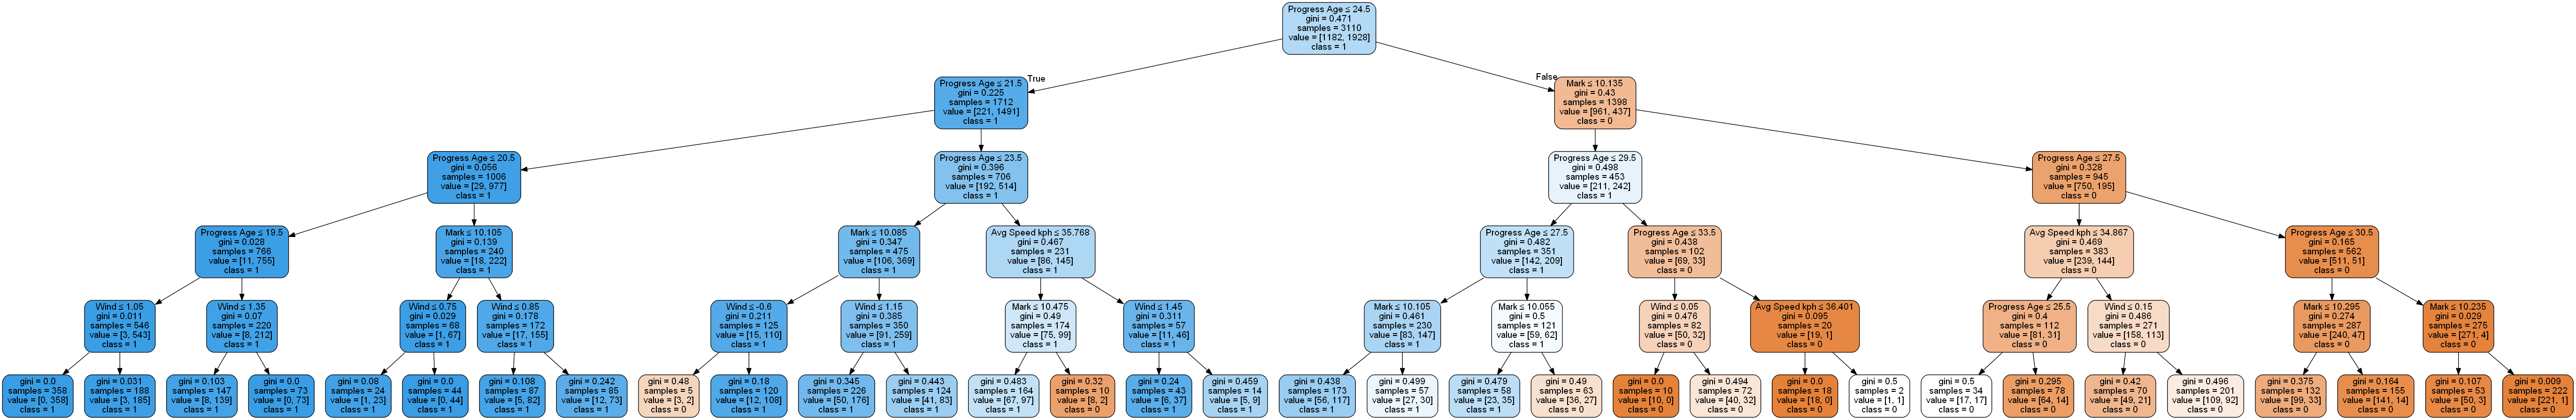

In [52]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [53]:
df_progress.head(50)

,Competitor,Code,Mark,Wind,Year,Venue,Date,Rank,Age,Nat,Record Age,Avg Speed kph,Progress Age,Beat record
0,Usain BOLT,14201847.0,9.95,0.7,2017,"Stade Louis II, Monaco (MON)",2017-07-21,1,33.0,JAM,23.0,36.180905,31.0,0
1,Usain BOLT,14201847.0,9.81,0.2,2016,"Estádio Olímpico, Rio de Janeiro (BRA)",2016-08-14,1,33.0,JAM,23.0,36.697248,30.0,0
2,Usain BOLT,14201847.0,9.79,-0.5,2015,"National Stadium, Beijing (CHN)",2015-08-23,1,33.0,JAM,23.0,36.772217,29.0,0
3,Usain BOLT,14201847.0,9.98,-0.6,2014,Warszawa (POL),2014-08-23,1,33.0,JAM,23.0,36.072144,28.0,0
4,Usain BOLT,14201847.0,9.77,-0.3,2013,"Luzhniki, Moskva (RUS)",2013-08-11,1,33.0,JAM,23.0,36.847492,27.0,0
5,Usain BOLT,14201847.0,9.63,1.5,2012,"Olympic Stadium, London (GBR)",2012-08-05,1,33.0,JAM,23.0,37.383178,26.0,0
6,Usain BOLT,14201847.0,9.76,1.3,2011,"Boudewijnstadion, Bruxelles (BEL)",2011-09-16,1,33.0,JAM,23.0,36.885246,25.0,0
7,Usain BOLT,14201847.0,9.82,0.5,2010,"Pontaise, Lausanne (SUI)",2010-07-08,1,33.0,JAM,23.0,36.659878,23.0,1
8,Usain BOLT,14201847.0,9.58,0.9,2009,"Olympiastadion, Berlin (GER)",2009-08-16,1,33.0,JAM,23.0,37.578288,23.0,1
9,Usain BOLT,14201847.0,9.69,0.0,2008,"National Stadium, Beijing (CHN)",2008-08-16,1,33.0,JAM,23.0,37.151703,22.0,1


# GaussianNB
Bayes’ theorem is based on conditional probability. The conditional probability helps us calculating the probability that something will happen, given that something else has already happened. 

<b>We can clearly see that the implemention of Decision Tree above was a bit better then GaussianNB </b>

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Train classifier
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))


Accuracy on Train data=  0.7884244372990353
Accuracy on test data=  0.8148425787106447


# KNeighborsClassifier

We can clearly see that using KNeighborsClassifier will get us a better precision.
First we chose the number of neighbors to be 5 after quick review on the graph below ,
We can see that a better number will be around 19-22 . 
In the class we learned that it is better not to use too many neighbors so we picked the neighbors number to be 19 


### Precision 
    
    0    0.79  
    
    1    0.84


In [55]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[365 145]
 [ 99 725]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       510
           1       0.83      0.88      0.86       824

    accuracy                           0.82      1334
   macro avg       0.81      0.80      0.80      1334
weighted avg       0.82      0.82      0.82      1334



In [56]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

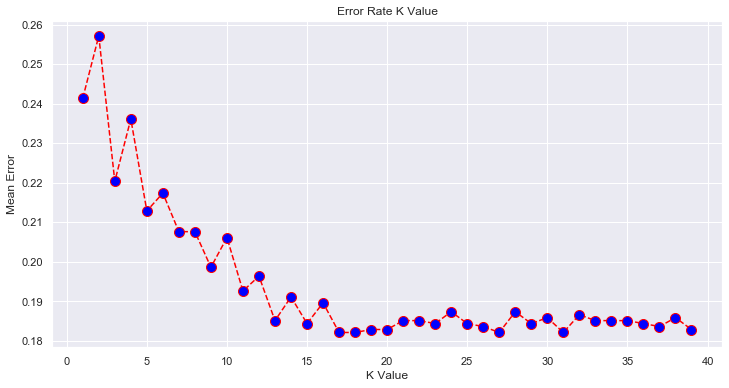

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Conclusion 

We can see that our best prediction was from KNeighborsClassifier.

with the lack of data our result was very good, We used the Wind, Progress Age, Mark, Avg Speed kph for helping us in the prediction. 

We saw that the Decision Tree max_depth plays an improtant roll in the prediction,nevertheless we learned a new Mechine Learning called GaussianNB and saw that the Decision Tree was leading by 1%.

To summrise our experince from the course we would like to say that we learn alot on Data Science We enjoyed to study new things in python such as using crawler,extract data, analyze data and more.

The course was really intresting and <b>we want to say thanks for our mentors</b>.  
